# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Hayley Massey

### https://github.com/HMas522/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Prerequisites

In [2]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- ---------------
annotated-types           0.6.0
anyio                     3.7.1
appdirs                   1.4.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asgiref                   3.7.2
asttokens                 2.2.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
backcall                  0.2.0
beautifulsoup4            4.12.2
black                     24.1.1
bleach                    6.1.0
blis                      0.7.11
build                     1.0.3
catalogue                 2.0.10
certifi                   2023.7.22
cffi                      1.16.0
charset-normalizer        3.2.0
click                     8.1.4
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.2.1
confection                0.1.4
contextvars               2.4
contourpy                 1.2.0
cycler          

## Question 1
1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [4]:
# set up imports
import requests
from bs4 import BeautifulSoup
import pickle

# call request
response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')

# good soup
soup = BeautifulSoup(response.text, "html.parser")

# extract string 'str' word article using soup find
article_html = str(soup.find("article"))

# create pickle dump and name file name
with open("article_html.pkl", "wb") as file:
    pickle.dump(article_html, file)

## Question 2
2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [6]:
# set up imports
import pickle
from bs4 import BeautifulSoup

# open and load file previously created
with open("article_html.pkl", "rb") as file:
    article_html = pickle.load(file)

# good soup 
soup = BeautifulSoup(article_html, "html.parser")

article_element = soup.find('article')

# display using print fx and get_text
print(article_element.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

## Question 3
3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [138]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

def key_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)

unique_tokens = [token.text.lower() for token in doc if key_words(token)]
token_freq = Counter(unique_tokens)
print("Most Frequent Tokens:")
print(token_freq.most_common(10))

Most Frequent Tokens:
[('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10), ('light', 9), ('high', 8), ('beam', 7), ('automotive', 6), ('leds', 6)]


## Question 4
4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [137]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

def key_words(lemmas):
    return not (lemmas.is_space or lemmas.is_punct or lemmas.is_stop)

unique_lemmas = [token.lemma_.lower() for token in doc if key_words(token)]
lemma_freq = Counter(unique_lemmas)
print("Most Frequent Lemmas:")
print(lemma_freq.most_common(10))

Most Frequent Lemmas:
[('laser', 40), ('headlight', 28), ('beam', 12), ('technology', 10), ('light', 10), ('lead', 9), ('high', 9), ('come', 7), ('led', 7), ('automotive', 6)]


## Question 5
5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [149]:
sentences = list(doc.sents)

def sentence_length (sent):
    count = 0
    for token in sent:
        if not(token.is_space or token.is_punct):
            count += 1
    return count
print("Sentence:", sentences[1])
print("Number of words in sentence:",sentence_length(sentences[1]))

def key_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)
    unique_tokens = [token.text.lower() for token in doc if key_words(token)]
    score = unqiue_tokens / sentence_length (sent)
    return score
print("Score:", score)


Sentence: When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Number of words in sentence: 21
Score: 0.4


In [151]:
sentences = list(doc.sents)

def sentence_length (sent):
    count = 0
    for lemma in sent:
        if not(lemma.is_space or lemma.is_punct):
            count += 1
    return count
print("Sentence:", sentences[1])
print("Number of words in sentence:",sentence_length(sentences[1]))

def key_words(lemmas):
    return not (lemmas.is_space or lemmas.is_punct or lemmas.is_stop)
    unique_lemmas = [token.lemma_.lower() for token in doc if key_words(token)]
    score = unqiue_lemmas / sentence_length (sent)
    return score
print("Score:", score)

Sentence: When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Number of words in sentence: 21
Score: 0.4


## Question 6
6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [107]:
token_words = set()
for token, freq in token_freq.most_common(5):
    token_words.add(token)
print(token_words)

{'laser', 'headlight', 'led', 'technology', 'headlights'}


In [99]:
sentences = list(doc.sents) 
for sentence in sentences:
    count1= 0
    for token in sentence:
        if token.text.lower() in key_words:
            count1+= 1
    count2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count2 += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count1/count2,':',sent_str)        

0.08333333333333333 : How Laser Headlights Work        130 Comments      by:Lewin DayMarch 22, 2021
0.047619047619047616 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
0.0 : Engines, fuel efficiency, and the switch to electric power are all more front of mind.
0.0 : However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
0.038461538461538464 : Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
0.16666666666666666 : Now, a new technology is on the scene, with lasers!Laser Headlights?!
0.25 : BWM’s prototype laser headlight assemblies undergoing testing.
0.08695652173913043 : The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobi

In [43]:
def sentence_length (sent):
    count = 0
    for token in sent:
        if not(token.is_space or token.is_punct):
            count += 1
    return count
print("Number of words in sentence:",sentence_length(sentences[1]),"The Sentence:", sentences[1])

Number of words in sentence: 21 The Sentence: When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.


In [100]:
# List of scores containing tokens

token_scores_sentence = []
for sentence in sentences:
    count1= 0
    for token in sentence:
        if token.text.lower() in key_words:
            count1 += 1
    count2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count2 += 1
    score = count1 / count2 if count2 > 0 else 0
    token_scores_sentence.append(score)

print("Token Score", (token_scores_sentence))

Token Score [0.08333333333333333, 0.047619047619047616, 0.0, 0.0, 0.038461538461538464, 0.16666666666666666, 0.25, 0.08695652173913043, 0.047619047619047616, 0.07142857142857142, 0.1875, 0.0, 0.045454545454545456, 0.1111111111111111, 0.045454545454545456, 0.1875, 0.1, 0.09090909090909091, 0.07692307692307693, 0.0, 0.0, 0.045454545454545456, 0.03773584905660377, 0.0, 0.03333333333333333, 0.23529411764705882, 0.05555555555555555, 0.0, 0.047619047619047616, 0.12121212121212122, 0.05263157894736842, 0.0, 0.06451612903225806, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.14285714285714285, 0.05714285714285714, 0.0, 0.0, 0.0, 0.125, 0.14634146341463414, 0.03225806451612903, 0.08333333333333333, 0.1111111111111111, 0.04, 0.04, 0.030303030303030304, 0.08695652173913043, 0.07407407407407407, 0.041666666666666664, 0.0, 0.4]


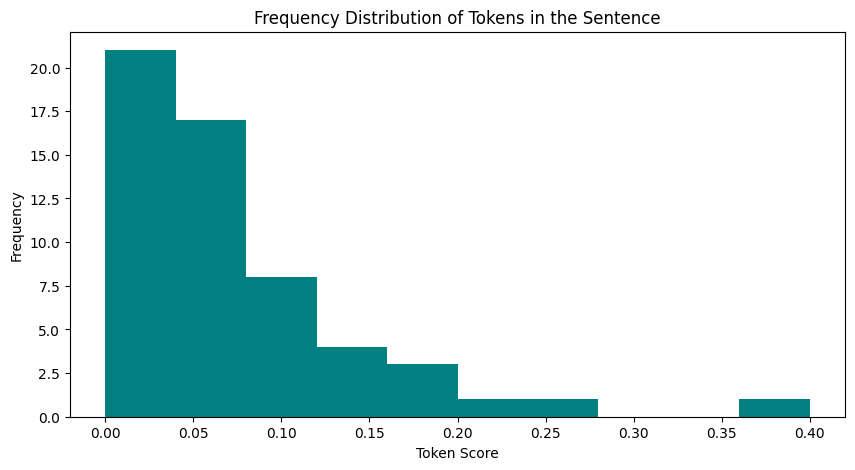

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Dimensions of figure; how wide and how long  
fig = plt.figure(figsize = (10, 5))
 
# creating the histogram
plt.hist(token_scores_sentence, bins=10, color='teal')
 
#Label the axis
plt.xlabel("Token Score")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Tokens in the Sentence")
#print the graph
plt.show()


The most common score is 0.0, which is logical because we removed common key words like: the, is, a, etc. Words are unique in there own way. Laser is not going to appear in every sentence of the article, unless the article is written by a 5th grader with no sentence structure.

## Question 7
7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [105]:
lemma_words = set()
for lemma, freq in lemma_freq.most_common(5):
    lemma_words.add(lemma)
print(lemma_words)

{'laser', 'headlight', 'technology', 'beam', 'light'}


In [106]:
sentences = list(doc.sents) 
for sentence in sentences:
    count1= 0
    for lemma in sentence:
        if lemma.text.lower() in lemma_words:
            count1+= 1
    count2 = 0
    for lemma in sentence:
        if not(lemma.is_space or lemma.is_punct):
            count2 += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count1/count2,':',sent_str)  

0.08333333333333333 : How Laser Headlights Work        130 Comments      by:Lewin DayMarch 22, 2021
0.047619047619047616 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
0.0 : Engines, fuel efficiency, and the switch to electric power are all more front of mind.
0.0 : However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
0.038461538461538464 : Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
0.16666666666666666 : Now, a new technology is on the scene, with lasers!Laser Headlights?!
0.25 : BWM’s prototype laser headlight assemblies undergoing testing.
0.08695652173913043 : The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobi

In [113]:
# List of scores containing Lemmas

lemma_scores_sentence = []
for sentence in sentences:
    count1= 0
    for lemma in sentence:
        if lemma.text.lower() in lemma_words:
            count1 += 1
    count2 = 0
    for lemma in sentence:
        if not(lemma.is_space or lemma.is_punct):
            count2 += 1
    score = count1 / count2 if count2 > 0 else 0
    lemma_scores_sentence.append(score)

print("Lemma Score", (lemma_scores_sentence))

Lemma Score [0.08333333333333333, 0.047619047619047616, 0.0, 0.0, 0.038461538461538464, 0.16666666666666666, 0.25, 0.08695652173913043, 0.047619047619047616, 0.07142857142857142, 0.1875, 0.0, 0.045454545454545456, 0.1111111111111111, 0.045454545454545456, 0.1875, 0.1, 0.09090909090909091, 0.07692307692307693, 0.0, 0.0, 0.045454545454545456, 0.03773584905660377, 0.0, 0.03333333333333333, 0.23529411764705882, 0.05555555555555555, 0.0, 0.047619047619047616, 0.12121212121212122, 0.05263157894736842, 0.0, 0.06451612903225806, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.14285714285714285, 0.05714285714285714, 0.0, 0.0, 0.0, 0.125, 0.14634146341463414, 0.03225806451612903, 0.08333333333333333, 0.1111111111111111, 0.04, 0.04, 0.030303030303030304, 0.08695652173913043, 0.07407407407407407, 0.041666666666666664, 0.0, 0.4]


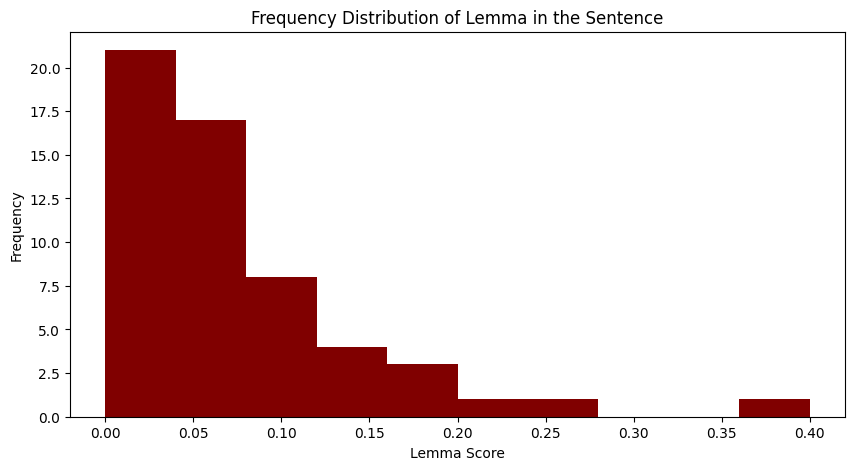

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Dimensions of figure; how wide and how long  
fig = plt.figure(figsize = (10, 5))
 
# creating the histogram
plt.hist(lemma_scores_sentence, bins=10, color='maroon')
 
#Label the axis
plt.xlabel("Lemma Score")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Lemma in the Sentence")
#print the graph
plt.show()

Similar to question 6 answer. Lemmas are the base words. For example, headlight(s) and laser(s), these words are just as unique but with different english conjugation, lemmas are not common words like the, a, is, etc. The scores would be similar to their tokens. 

## Question 8
8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

In [157]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

nouns = []
for token in doc:
    if not token.is_stop | token.is_punct and token.pos_ == "NOUN":
        nouns.append(token.text)

print(nouns)


['technology', 'headlights', 'thing', 'Engines', 'fuel', 'efficiency', 'switch', 'power', 'mind', 'thousands', 'engineers', 'world', 'state', 'art', 'lighting', 'day', 'day', 'beam', 'headlights', 'way', 'designs', 'regulations', 'bulbs', 'halogens', 'LEDs', 'technology', 'scene', 'lasers', 'prototype', 'laser', 'assemblies', 'testing', 'image', 'mind', 'phrase', 'laser', 'headlights', 'laser', 'beams', 'automobile', 'beams', 'light', 'illumination', 'spot', 'distance', 'eyes', 'laser', 'headlights', 'way', 'laser', 'headlights', 'state', 'laser', 'diodes', 'headlight', 'lasers', 'phosphor', 'LEDs', 'light', 'reflectors', 'headlights', 'road', 'Laser', 'headlights', 'way', 'benefits', 'energy', 'LEDs', 'light', 'space', 'i8', 'vehicles', 'laser', 'technology', 'headlights', 'nascent', 'technology', 'vehicles', 'technology', 'partnership', 'lighting', 'experts', 'practice', 'beam', 'lamp', 'laser', 'spot', 'beams', 'illumination', 'meters', 'vehicle', 'beams', 'lights', 'diode', 'lasers

Not much would be gained from limiting the search to just nouns. The only words I see mising from Q3 & Q4 are "come" and "led". Which is only 2 replaced words out of the ten that I listed. 